In [1]:
from os import sys
sys.path.append("/meshAfterParty/")
#sys.path.append("../../meshAfterParty/meshAfterParty")

In [2]:
from importlib import reload
import os
from pathlib import Path
os.getcwd()

import neuron_utils as nru
nru = reload(nru)
import neuron
neuron=reload(neuron)
import neuron_visualizations as nviz
import time

In [3]:
import system_utils as su

# Loading the meshAFTERparty neuron object

In [5]:
nru = reload(nru)
saved_file_location = "/notebooks/test_neurons/preprocessed_neurons/meshafterparty/12345_double_soma_meshafterparty"

with su.suppress_stdout_stderr():
    su.ignore_warnings()
    uncompressed_neuron = nru.decompress_neuron(filepath=saved_file_location,
                         original_mesh=saved_file_location)

In [6]:
uncompressed_neuron.decomposition_type

'meshafterparty'

In [8]:
meshafterparty_neuron = uncompressed_neuron

# Visualize the Differences

In [12]:
import neuron_visualizations as nviz

In [54]:
return_colors = nviz.visualize_neuron(meshafterparty_neuron,
                      visualize_type=["mesh","skeleton"],
                      limb_branch_dict=dict(L0="all"),
                                     return_color_dict=True)


 Working on visualization type: mesh

 Working on visualization type: skeleton


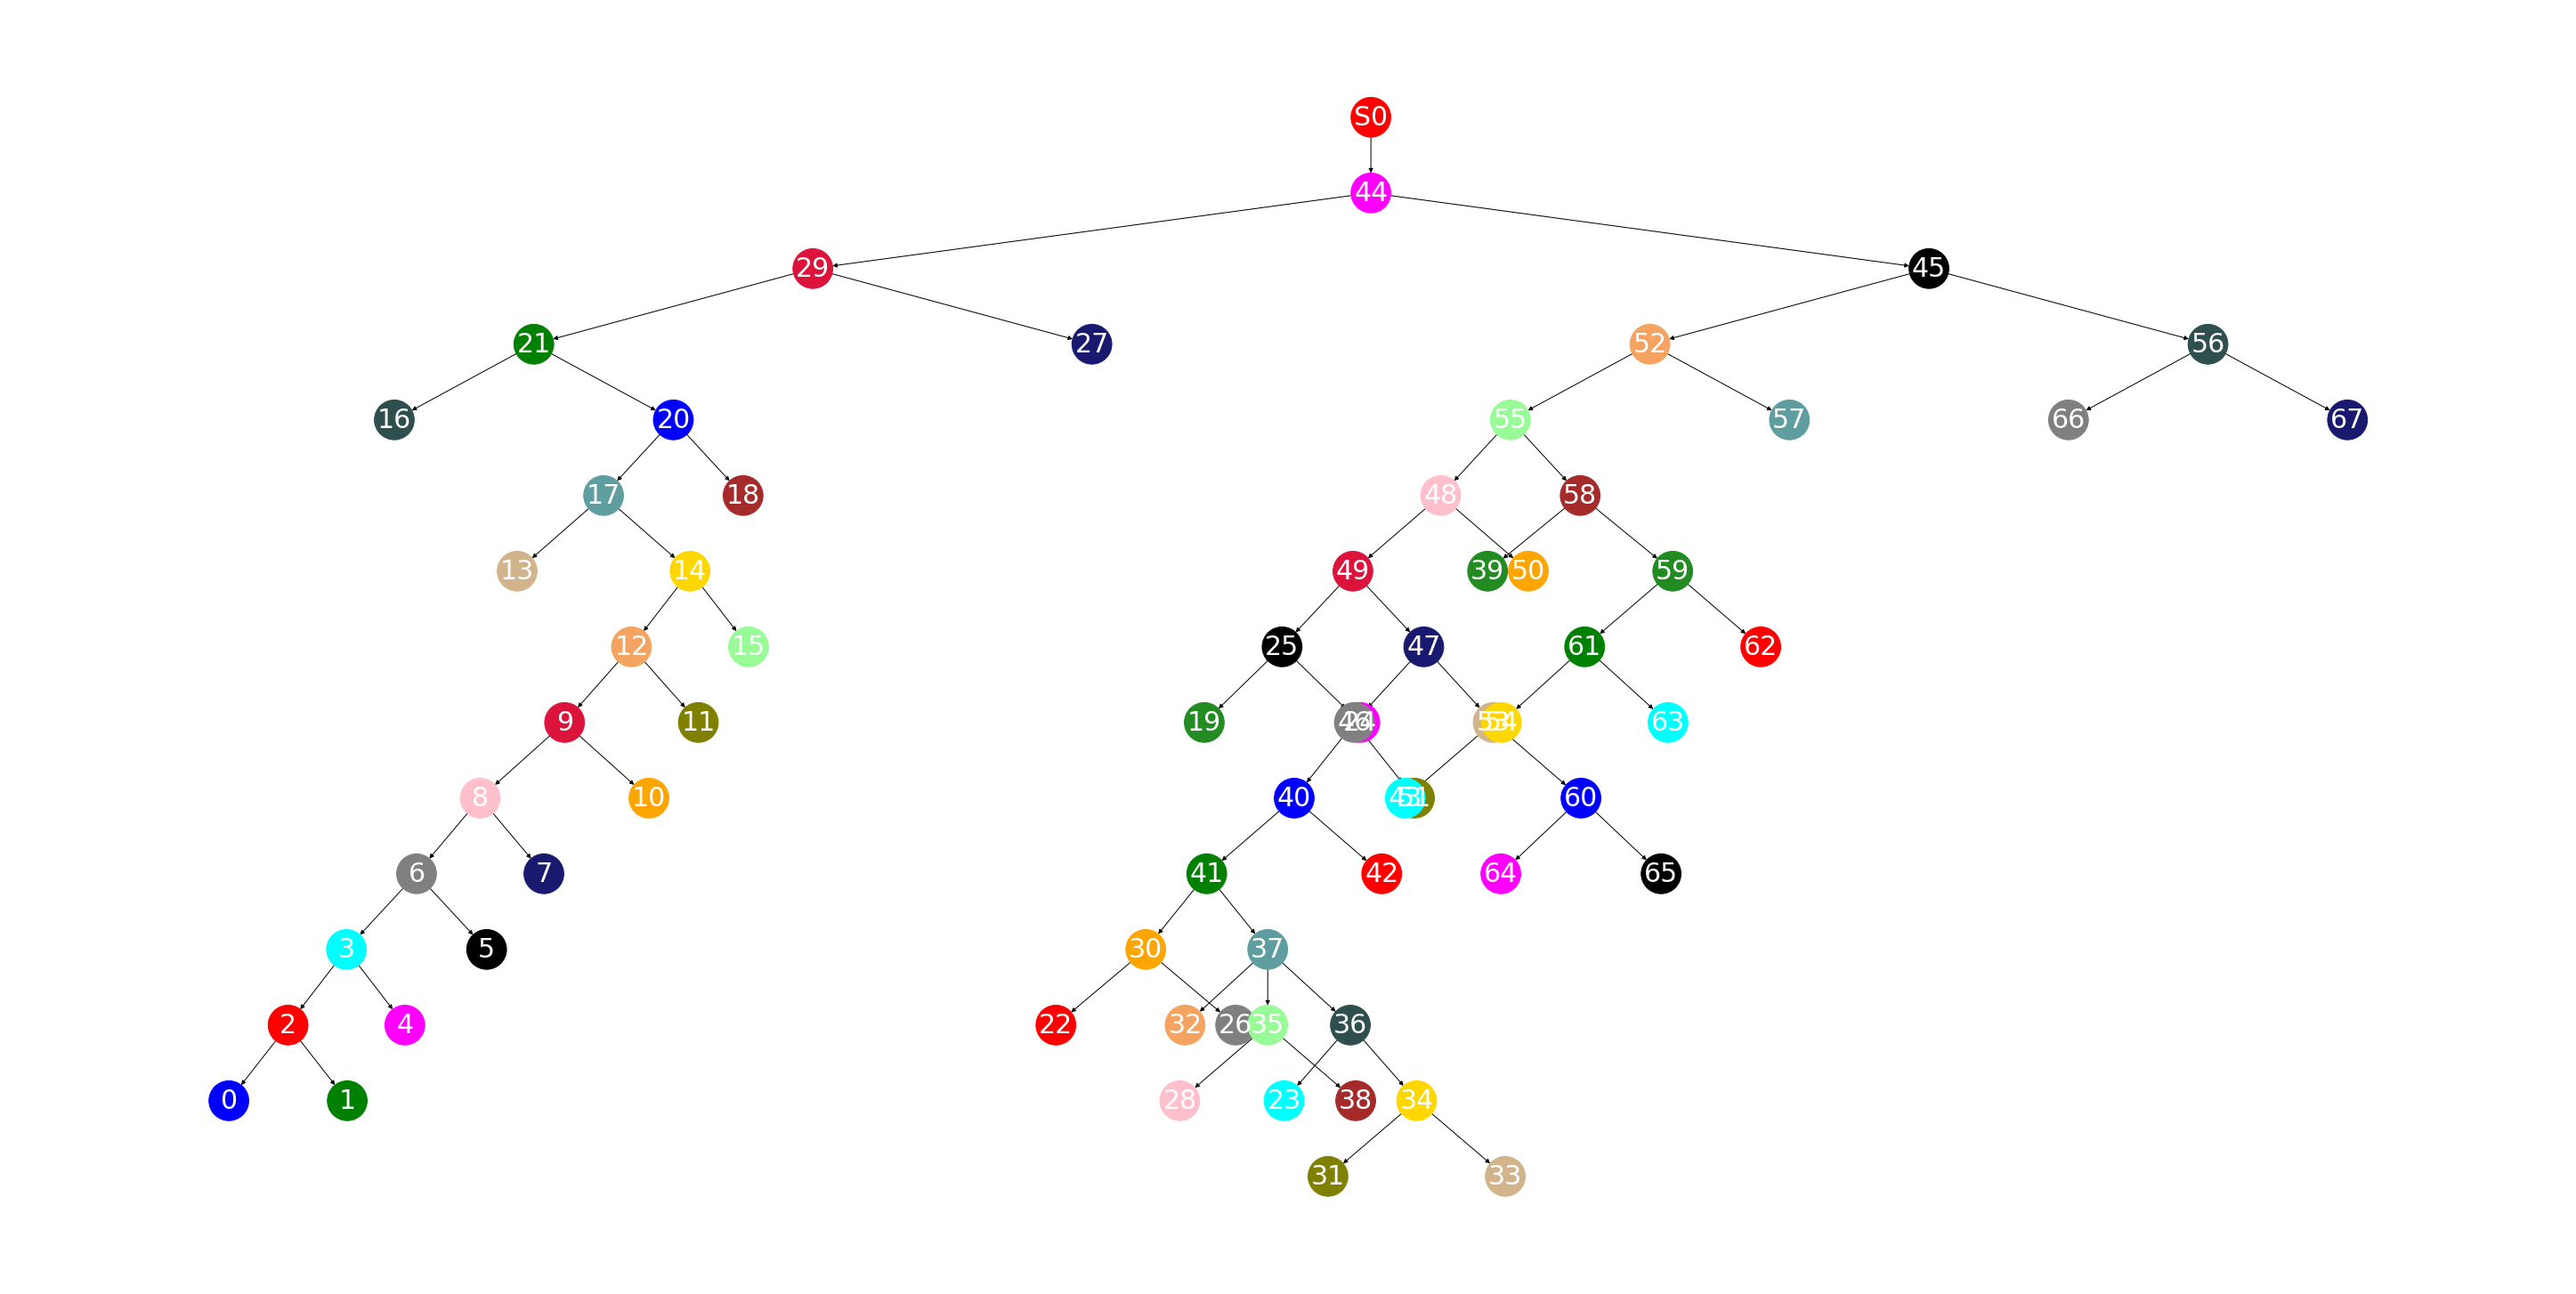

In [17]:
nviz.plot_limb_concept_network_2D(meshafterparty_neuron,
                                 limb_name="L0",
                                 node_colors=return_colors)

In [55]:

test_branch = meshafterparty_neuron[0][29]

nviz.visualize_neuron(meshafterparty_neuron,
                      visualize_type=["mesh","skeleton"],
                      mesh_whole_neuron=True,
                     limb_branch_dict=dict(L0=[56]))


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [56]:
import spine_utils as spu
found_spines = spu.get_spine_meshes_unfiltered_from_mesh(meshafterparty_neuron[0][56].mesh,segment_name="test")

In [57]:
import skeleton_utils as sk
sk.graph_skeleton_and_mesh(main_mesh_faces=meshafterparty_neuron[0][56].mesh.faces,
                           main_mesh_verts=meshafterparty_neuron[0][56].mesh.vertices,
                            other_meshes= found_spines,
                          other_meshes_colors="red")

# Looking at Meshparty Decomposition

# Loading the meshparty neuron object

In [9]:
nru = reload(nru)
neuron = reload(neuron)
with su.suppress_stdout_stderr():
    meshparty_neuron = nru.decompress_neuron(filepath="/notebooks/test_neurons/preprocessed_neurons/meshparty/12345_double_soma_meshparty",
                     original_mesh='/notebooks/test_neurons/preprocessed_neurons/meshparty/12345_double_soma_meshparty')

In [11]:
meshparty_neuron.decomposition_type

'meshparty'

In [58]:
return_colors = nviz.visualize_neuron(meshparty_neuron,
                      visualize_type=["mesh","skeleton"],
                      limb_branch_dict=dict(L0="all"),
                     return_color_dict=True)


 Working on visualization type: mesh

 Working on visualization type: skeleton


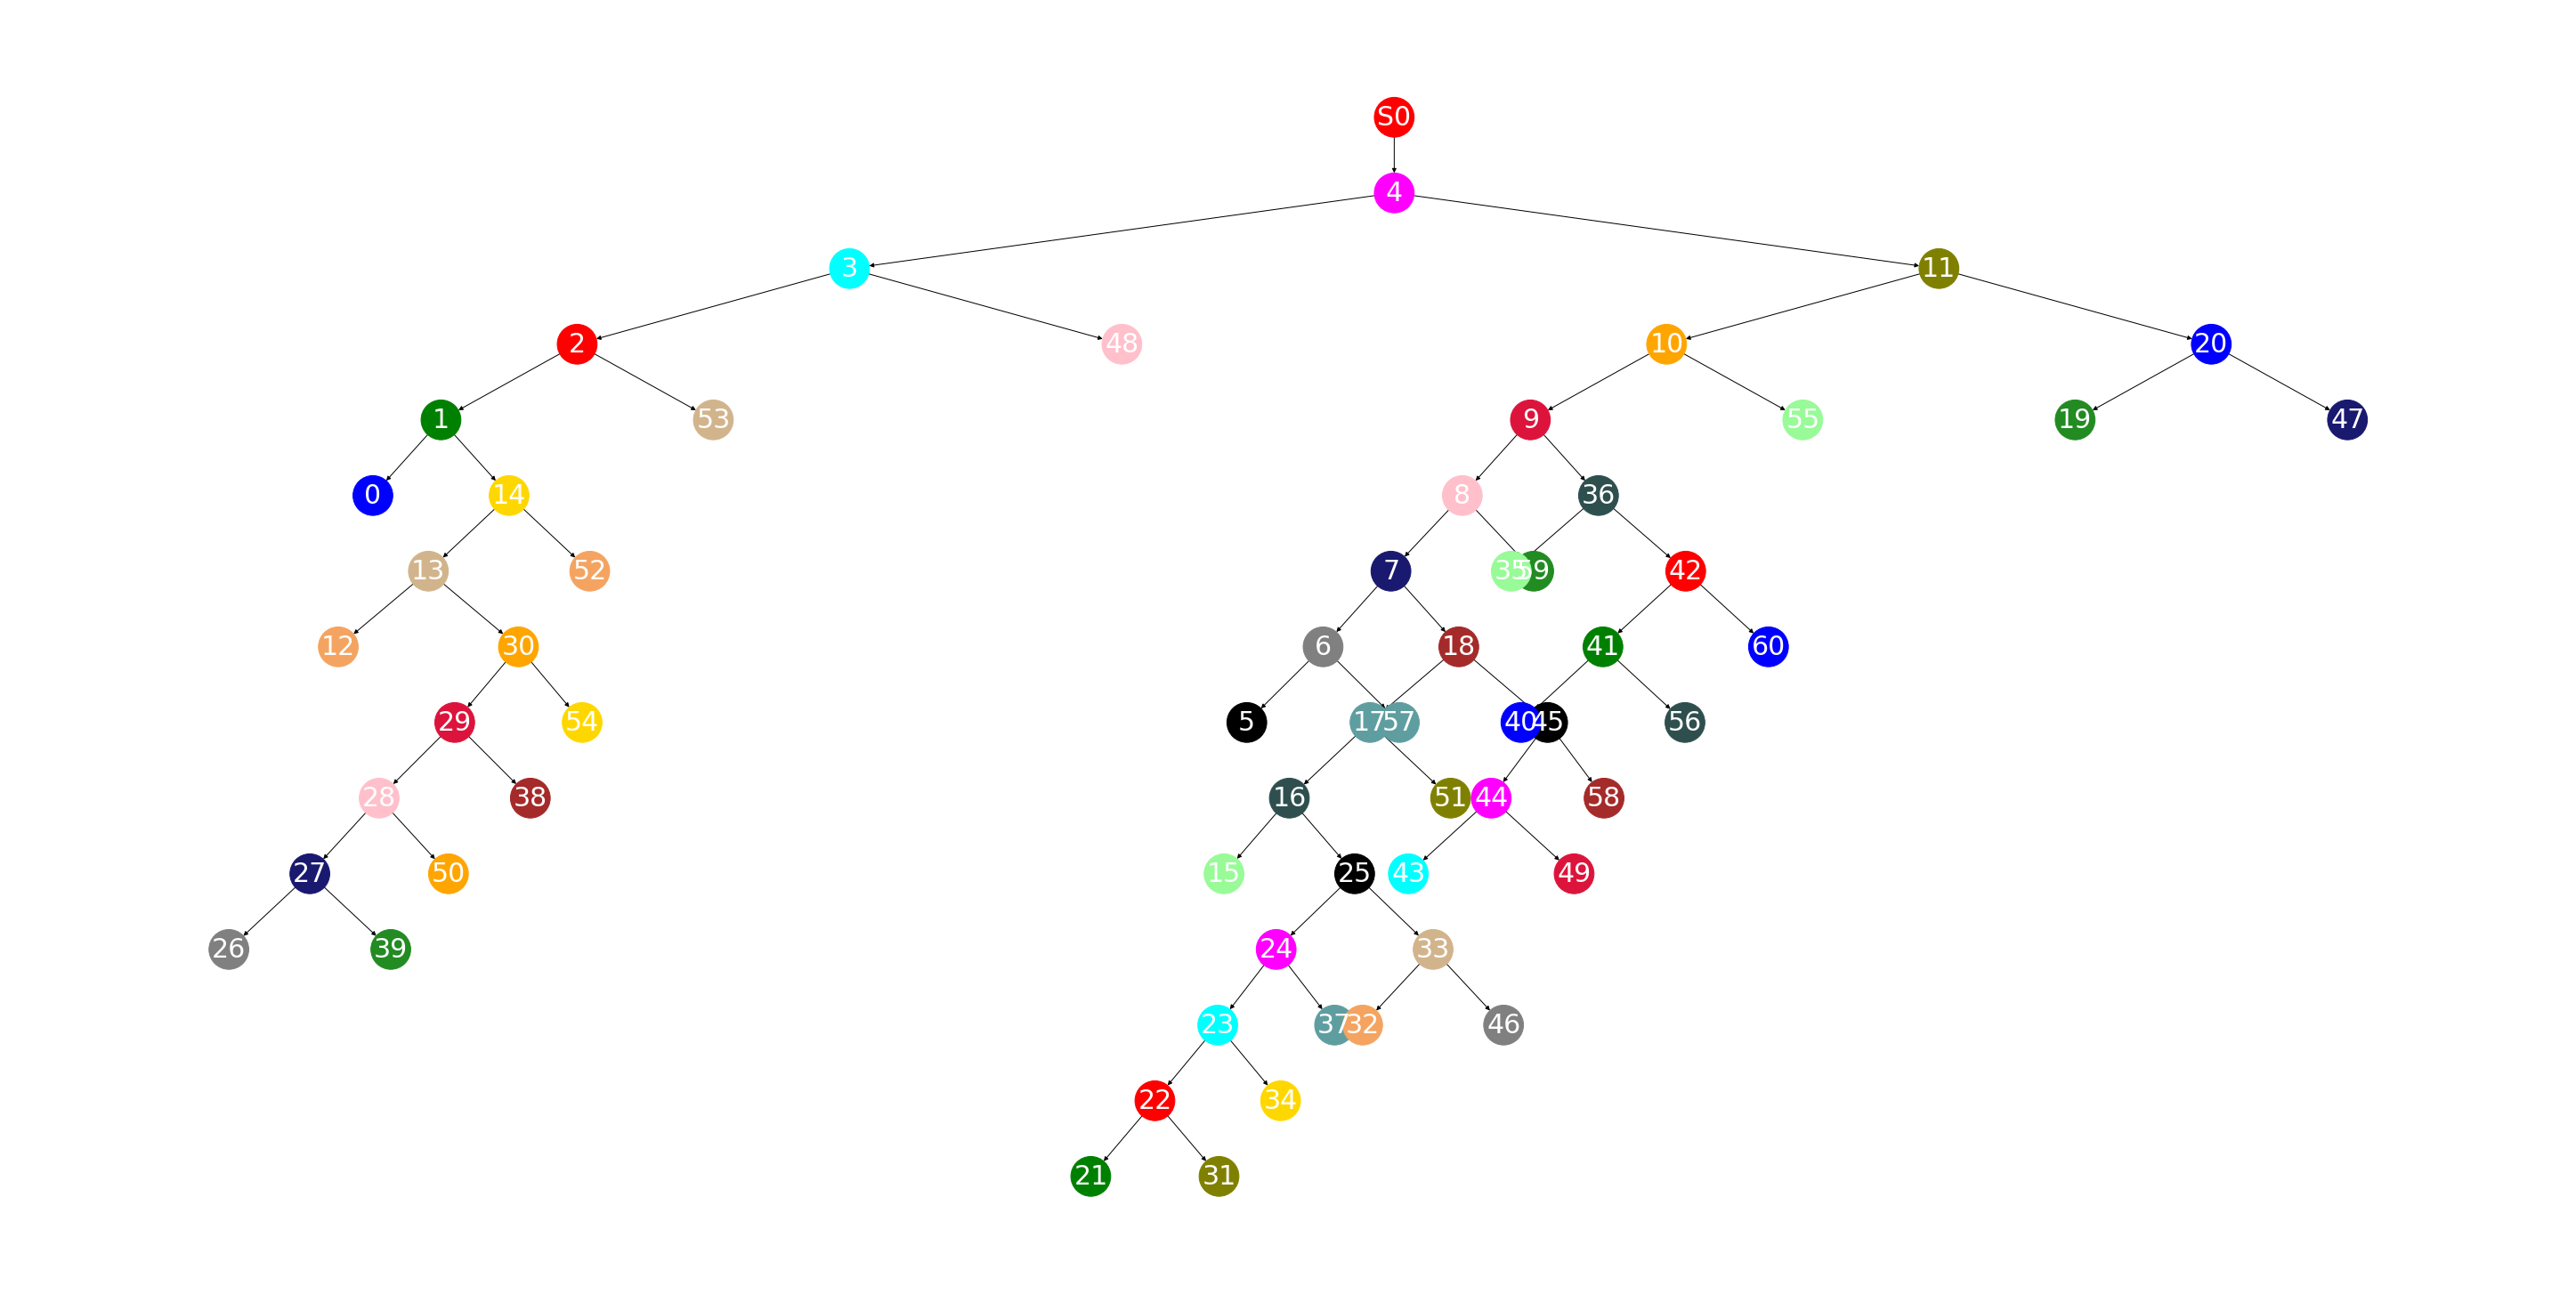

In [22]:
nviz.plot_limb_concept_network_2D(meshparty_neuron,
                                 limb_name="L0",
                                 node_colors=return_colors)

In [24]:
nviz.visualize_neuron(meshparty_neuron,
                      visualize_type=["mesh","skeleton"],
                      mesh_whole_neuron=True,
                     limb_branch_dict=dict(L0=[20]))


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [34]:
found_spines_meshparty = spu.get_spine_meshes_unfiltered_from_mesh(meshparty_neuron[0][20].mesh,segment_name="test")
found_spines_meshparty

array([<trimesh.Trimesh(vertices.shape=(21, 3), faces.shape=(30, 3))>,
       <trimesh.Trimesh(vertices.shape=(19, 3), faces.shape=(26, 3))>,
       <trimesh.Trimesh(vertices.shape=(9, 3), faces.shape=(12, 3))>,
       <trimesh.Trimesh(vertices.shape=(12, 3), faces.shape=(11, 3))>],
      dtype=object)

In [33]:
sk.graph_skeleton_and_mesh(main_mesh_faces=meshparty_neuron[0][20].mesh.faces,
                           main_mesh_verts=meshparty_neuron[0][20].mesh.vertices,
                            other_meshes= found_spines_meshparty,
                          other_meshes_colors="red")

# Meshparty with a better mesh correspondence

In [40]:
import time
meshparty_time = time.time()

import meshparty_skeletonize as m_sk
import preprocess_neuron as pn
pn = reload(pn)
m_sk = reload(m_sk)

somas = meshparty_neuron.get_somas()

nru = reload(nru)
neuron = reload(neuron)
double_neuron_processed = neuron.Neuron(
    mesh=meshparty_neuron.mesh,
    segment_id=meshparty_neuron.segment_id,
    description=meshparty_neuron.description,
    decomposition_type="meshparty",
    mesh_correspondence="meshparty",
    suppress_preprocessing_print=False,
    meshparty_segment_size = 500,
    meshparty_n_surface_downsampling = 0,
    meshparty_adaptive_correspondence_after_creation=True,
    
    somas = somas
    
)

print(f"Total time for processing: {time.time() - meshparty_time}")

--- 0) Having to preprocess the Neuron becuase no preprocessed data
Please wait this could take a while.....





****** Phase A ***************





Soma List = [<trimesh.Trimesh(vertices.shape=(20033, 3), faces.shape=(39751, 3))>, <trimesh.Trimesh(vertices.shape=(14008, 3), faces.shape=(27997, 3))>]
soma_mesh_list_centers = [array([756892.90988869, 959100.04558478, 874296.08365197]), array([863995.1225157 , 994485.2519703 , 859768.45075671])]
# total split meshes = 79
There were 78 pieces found after size threshold
# of non soma touching seperate meshes = 59
# of inside pieces = 19
# of soma containing seperate meshes = 1
meshes with somas = {0: [0, 1]}


----Working on soma-containing mesh piece {z}----

inside Soma subtraction
mesh pieces in subtact soma BEFORE the filtering inside pieces = [<trimesh.Trimesh(vertices.shape=(153745, 3), faces.shape=(308520, 3))>, <trimesh.Trimesh(vertices.shape=(87530, 3), faces.shape=(175927, 3))>, <trimesh.Trimesh(vertices.shape=(56737, 3), faces.

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for mesh_pieces_connectivity= 9.056101083755493
# of insignificant_limbs = 0 with trimesh : []
Using DECOMPOSITION TYPE: meshparty
------------Working on limb #0-------------
Root for limb 0 = [759380.2 950810.4 872694.7]

Step 1: Starting Skeletonization
smooth_neighborhood = 1
smooth_neighborhood = 1



100%|██████████| 1/1 [00:03<00:00,  3.51s/it]


Total time for meshParty skeletonization = 4.790239572525024

Step 2: Decomposing Branches
Resizing meshparty skeletal segments to length 500 nm
Total time for meshParty decomposition = 0.6546440124511719

Step 3: Mesh correspondence
max(original_labels),len(original_labels) = (60, 61)
empty_indices % = 0.0
 conflict_indices % = 0.013072086088422145


  0%|          | 0/1 [00:00<?, ?it/s]

Total time for meshParty mesh correspondence = 4.954824686050415

Step 4: Retrieving Widths
Total time for meshParty Retrieving Widths = 0.0040514469146728516

branch segment sizes = {0: (170, 2, 3), 1: (12, 2, 3), 2: (77, 2, 3), 3: (33, 2, 3), 4: (15, 2, 3), 5: (30, 2, 3), 6: (47, 2, 3), 7: (14, 2, 3), 8: (16, 2, 3), 9: (12, 2, 3), 10: (14, 2, 3), 11: (22, 2, 3), 12: (24, 2, 3), 13: (89, 2, 3), 14: (94, 2, 3), 15: (58, 2, 3), 16: (71, 2, 3), 17: (23, 2, 3), 18: (47, 2, 3), 19: (21, 2, 3), 20: (163, 2, 3), 21: (39, 2, 3), 22: (1, 2, 3), 23: (8, 2, 3), 24: (3, 2, 3), 25: (33, 2, 3), 26: (82, 2, 3), 27: (11, 2, 3), 28: (29, 2, 3), 29: (8, 2, 3), 30: (135, 2, 3), 31: (17, 2, 3), 32: (15, 2, 3), 33: (5, 2, 3), 34: (70, 2, 3), 35: (103, 2, 3), 36: (87, 2, 3), 37: (25, 2, 3), 38: (33, 2, 3), 39: (19, 2, 3), 40: (50, 2, 3), 41: (22, 2, 3), 42: (29, 2, 3), 43: (55, 2, 3), 44: (79, 2, 3), 45: (20, 2, 3), 46: (54, 2, 3), 47: (53, 2, 3), 48: (57, 2, 3), 49: (20, 2, 3), 50: (18, 2, 3), 51: (62, 2,


100%|██████████| 1/1 [00:01<00:00,  1.49s/it]


Total time for meshParty skeletonization = 2.2549097537994385

Step 2: Decomposing Branches
Resizing meshparty skeletal segments to length 500 nm
Total time for meshParty decomposition = 0.4498913288116455

Step 3: Mesh correspondence
max(original_labels),len(original_labels) = (45, 46)
empty_indices % = 0.0
 conflict_indices % = 0.011567297799655539


  0%|          | 0/56736 [00:00<?, ?it/s]

Total time for meshParty mesh correspondence = 2.388446807861328

Step 4: Retrieving Widths
Total time for meshParty Retrieving Widths = 0.003278017044067383

branch segment sizes = {0: (167, 2, 3), 1: (73, 2, 3), 2: (190, 2, 3), 3: (25, 2, 3), 4: (54, 2, 3), 5: (74, 2, 3), 6: (4, 2, 3), 7: (37, 2, 3), 8: (15, 2, 3), 9: (27, 2, 3), 10: (7, 2, 3), 11: (21, 2, 3), 12: (35, 2, 3), 13: (56, 2, 3), 14: (37, 2, 3), 15: (5, 2, 3), 16: (59, 2, 3), 17: (50, 2, 3), 18: (3, 2, 3), 19: (30, 2, 3), 20: (11, 2, 3), 21: (1, 2, 3), 22: (1, 2, 3), 23: (31, 2, 3), 24: (61, 2, 3), 25: (105, 2, 3), 26: (13, 2, 3), 27: (31, 2, 3), 28: (109, 2, 3), 29: (11, 2, 3), 30: (225, 2, 3), 31: (45, 2, 3), 32: (6, 2, 3), 33: (29, 2, 3), 34: (51, 2, 3), 35: (43, 2, 3), 36: (35, 2, 3), 37: (2, 2, 3), 38: (12, 2, 3), 39: (58, 2, 3), 40: (21, 2, 3), 41: (14, 2, 3), 42: (135, 2, 3), 43: (137, 2, 3), 44: (23, 2, 3), 45: (17, 2, 3)}
------------Working on limb #2-------------
Root for limb 2 = [761454.4 960536.5 866299.1]




100%|██████████| 1/1 [00:00<00:00,  1.09it/s]


Total time for meshParty skeletonization = 1.440159797668457

Step 2: Decomposing Branches
Resizing meshparty skeletal segments to length 500 nm
Total time for meshParty decomposition = 0.338623046875

Step 3: Mesh correspondence
max(original_labels),len(original_labels) = (47, 48)
empty_indices % = 0.0
 conflict_indices % = 0.019225045086057466


  0%|          | 0/54843 [00:00<?, ?it/s]

Total time for meshParty mesh correspondence = 2.0709402561187744

Step 4: Retrieving Widths
Total time for meshParty Retrieving Widths = 0.0033762454986572266

branch segment sizes = {0: (76, 2, 3), 1: (3, 2, 3), 2: (3, 2, 3), 3: (125, 2, 3), 4: (30, 2, 3), 5: (5, 2, 3), 6: (2, 2, 3), 7: (31, 2, 3), 8: (55, 2, 3), 9: (19, 2, 3), 10: (1, 2, 3), 11: (2, 2, 3), 12: (8, 2, 3), 13: (6, 2, 3), 14: (33, 2, 3), 15: (30, 2, 3), 16: (14, 2, 3), 17: (48, 2, 3), 18: (6, 2, 3), 19: (35, 2, 3), 20: (13, 2, 3), 21: (2, 2, 3), 22: (59, 2, 3), 23: (17, 2, 3), 24: (3, 2, 3), 25: (1, 2, 3), 26: (79, 2, 3), 27: (5, 2, 3), 28: (19, 2, 3), 29: (127, 2, 3), 30: (64, 2, 3), 31: (12, 2, 3), 32: (90, 2, 3), 33: (3, 2, 3), 34: (26, 2, 3), 35: (11, 2, 3), 36: (18, 2, 3), 37: (36, 2, 3), 38: (14, 2, 3), 39: (31, 2, 3), 40: (4, 2, 3), 41: (47, 2, 3), 42: (13, 2, 3), 43: (117, 2, 3), 44: (11, 2, 3), 45: (51, 2, 3), 46: (20, 2, 3), 47: (58, 2, 3)}
------------Working on limb #3-------------
Root for limb 3 = [748998


100%|██████████| 1/1 [00:00<00:00,  1.41it/s]


Total time for meshParty skeletonization = 1.2117373943328857

Step 2: Decomposing Branches
Resizing meshparty skeletal segments to length 500 nm
Total time for meshParty decomposition = 0.3054637908935547

Step 3: Mesh correspondence
max(original_labels),len(original_labels) = (33, 34)
empty_indices % = 0.0
 conflict_indices % = 0.011864252570284778


  0%|          | 0/53674 [00:00<?, ?it/s]

Total time for meshParty mesh correspondence = 1.9470484256744385

Step 4: Retrieving Widths
Total time for meshParty Retrieving Widths = 0.002778291702270508

branch segment sizes = {0: (31, 2, 3), 1: (6, 2, 3), 2: (2, 2, 3), 3: (2, 2, 3), 4: (24, 2, 3), 5: (2, 2, 3), 6: (16, 2, 3), 7: (14, 2, 3), 8: (50, 2, 3), 9: (10, 2, 3), 10: (15, 2, 3), 11: (47, 2, 3), 12: (13, 2, 3), 13: (17, 2, 3), 14: (43, 2, 3), 15: (46, 2, 3), 16: (13, 2, 3), 17: (14, 2, 3), 18: (22, 2, 3), 19: (4, 2, 3), 20: (64, 2, 3), 21: (184, 2, 3), 22: (11, 2, 3), 23: (119, 2, 3), 24: (46, 2, 3), 25: (5, 2, 3), 26: (40, 2, 3), 27: (105, 2, 3), 28: (113, 2, 3), 29: (13, 2, 3), 30: (36, 2, 3), 31: (32, 2, 3), 32: (91, 2, 3), 33: (154, 2, 3)}
------------Working on limb #4-------------
Root for limb 4 = [863723.6 997895.8 867502.1]

Step 1: Starting Skeletonization
smooth_neighborhood = 1
smooth_neighborhood = 1



100%|██████████| 1/1 [00:00<00:00,  1.23it/s]


Total time for meshParty skeletonization = 1.316828966140747

Step 2: Decomposing Branches
Resizing meshparty skeletal segments to length 500 nm
Total time for meshParty decomposition = 0.37667322158813477

Step 3: Mesh correspondence
max(original_labels),len(original_labels) = (34, 35)
empty_indices % = 0.0
 conflict_indices % = 0.009204562342101352


  0%|          | 0/51730 [00:00<?, ?it/s]

Total time for meshParty mesh correspondence = 1.3720948696136475

Step 4: Retrieving Widths
Total time for meshParty Retrieving Widths = 0.0027399063110351562

branch segment sizes = {0: (3, 2, 3), 1: (49, 2, 3), 2: (6, 2, 3), 3: (14, 2, 3), 4: (181, 2, 3), 5: (100, 2, 3), 6: (60, 2, 3), 7: (6, 2, 3), 8: (5, 2, 3), 9: (7, 2, 3), 10: (28, 2, 3), 11: (71, 2, 3), 12: (4, 2, 3), 13: (44, 2, 3), 14: (28, 2, 3), 15: (1, 2, 3), 16: (294, 2, 3), 17: (124, 2, 3), 18: (42, 2, 3), 19: (3, 2, 3), 20: (30, 2, 3), 21: (21, 2, 3), 22: (13, 2, 3), 23: (25, 2, 3), 24: (72, 2, 3), 25: (30, 2, 3), 26: (13, 2, 3), 27: (28, 2, 3), 28: (126, 2, 3), 29: (15, 2, 3), 30: (20, 2, 3), 31: (106, 2, 3), 32: (11, 2, 3), 33: (104, 2, 3), 34: (47, 2, 3)}
------------Working on limb #5-------------
Root for limb 5 = [751197.4 964214.6 869843.8]

Step 1: Starting Skeletonization
smooth_neighborhood = 1
smooth_neighborhood = 1



100%|██████████| 1/1 [00:00<00:00,  3.48it/s]


Total time for meshParty skeletonization = 0.7385964393615723

Step 2: Decomposing Branches
Resizing meshparty skeletal segments to length 500 nm
Total time for meshParty decomposition = 0.17500901222229004

Step 3: Mesh correspondence
max(original_labels),len(original_labels) = (7, 8)
empty_indices % = 0.0
 conflict_indices % = 0.004574873829795431


 92%|█████████▏| 26837/29257 [00:00<00:00, 248113.26it/s]

Total time for meshParty mesh correspondence = 1.696441888809204

Step 4: Retrieving Widths
Total time for meshParty Retrieving Widths = 0.001300811767578125

branch segment sizes = {0: (320, 2, 3), 1: (50, 2, 3), 2: (22, 2, 3), 3: (28, 2, 3), 4: (36, 2, 3), 5: (1, 2, 3), 6: (131, 2, 3), 7: (309, 2, 3)}
------------Working on limb #6-------------
Root for limb 6 = [866059.4 987846.9 860665.4]

Step 1: Starting Skeletonization
smooth_neighborhood = 1
smooth_neighborhood = 1


100%|██████████| 1/1 [00:00<00:00,  4.12it/s]


Total time for meshParty skeletonization = 0.5320179462432861

Step 2: Decomposing Branches
Resizing meshparty skeletal segments to length 500 nm
Total time for meshParty decomposition = 0.16855335235595703

Step 3: Mesh correspondence
max(original_labels),len(original_labels) = (16, 17)
empty_indices % = 0.0
 conflict_indices % = 0.010640656173797385


 91%|█████████ | 26413/29123 [00:00<00:00, 218721.86it/s]

Total time for meshParty mesh correspondence = 0.7452993392944336

Step 4: Retrieving Widths
Total time for meshParty Retrieving Widths = 0.0017571449279785156

branch segment sizes = {0: (52, 2, 3), 1: (67, 2, 3), 2: (13, 2, 3), 3: (9, 2, 3), 4: (5, 2, 3), 5: (1, 2, 3), 6: (11, 2, 3), 7: (19, 2, 3), 8: (131, 2, 3), 9: (22, 2, 3), 10: (47, 2, 3), 11: (76, 2, 3), 12: (47, 2, 3), 13: (51, 2, 3), 14: (185, 2, 3), 15: (20, 2, 3), 16: (61, 2, 3)}
------------Working on limb #7-------------
Root for limb 7 = [866977.6 993418.2 851160.9]

Step 1: Starting Skeletonization
smooth_neighborhood = 1
smooth_neighborhood = 1


100%|██████████| 1/1 [00:00<00:00,  3.89it/s]


Total time for meshParty skeletonization = 0.542863130569458

Step 2: Decomposing Branches
Resizing meshparty skeletal segments to length 500 nm
Total time for meshParty decomposition = 0.1711423397064209

Step 3: Mesh correspondence
max(original_labels),len(original_labels) = (18, 19)
empty_indices % = 0.0
 conflict_indices % = 0.010771992818671455


100%|██████████| 1/1 [00:00<00:00, 10.81it/s]

Total time for meshParty mesh correspondence = 0.7309994697570801

Step 4: Retrieving Widths
Total time for meshParty Retrieving Widths = 0.0018734931945800781

branch segment sizes = {0: (24, 2, 3), 1: (78, 2, 3), 2: (26, 2, 3), 3: (29, 2, 3), 4: (15, 2, 3), 5: (53, 2, 3), 6: (2, 2, 3), 7: (127, 2, 3), 8: (11, 2, 3), 9: (92, 2, 3), 10: (31, 2, 3), 11: (2, 2, 3), 12: (61, 2, 3), 13: (35, 2, 3), 14: (35, 2, 3), 15: (63, 2, 3), 16: (126, 2, 3), 17: (11, 2, 3), 18: (12, 2, 3)}
------------Working on limb #8-------------
Root for limb 8 = [863211.6 995430.6 851351.6]

Step 1: Starting Skeletonization
smooth_neighborhood = 1
smooth_neighborhood = 1


Total time for meshParty skeletonization = 0.25441694259643555

Step 2: Decomposing Branches
Resizing meshparty skeletal segments to length 500 nm
Total time for meshParty decomposition = 0.10024333000183105

Step 3: Mesh correspondence
max(original_labels),len(original_labels) = (10, 11)
empty_indices % = 0.0
 conflict_indices % = 0.00938156201314096


100%|██████████| 1/1 [00:00<00:00, 43.23it/s]

Total time for meshParty mesh correspondence = 0.37132740020751953

Step 4: Retrieving Widths
Total time for meshParty Retrieving Widths = 0.001361846923828125

branch segment sizes = {0: (25, 2, 3), 1: (171, 2, 3), 2: (6, 2, 3), 3: (43, 2, 3), 4: (45, 2, 3), 5: (19, 2, 3), 6: (115, 2, 3), 7: (14, 2, 3), 8: (2, 2, 3), 9: (14, 2, 3), 10: (20, 2, 3)}
------------Working on limb #9-------------
Root for limb 9 = [866799.  998813.7 866288.2]

Step 1: Starting Skeletonization
smooth_neighborhood = 1
smooth_neighborhood = 1
Total time for meshParty skeletonization = 0.0877695083618164

Step 2: Decomposing Branches
Resizing meshparty skeletal segments to length 500 nm
Total time for meshParty decomposition = 0.05746150016784668

Step 3: Mesh correspondence
max(original_labels),len(original_labels) = (5, 6)
empty_indices % = 0.0
 conflict_indices % = 0.01762677225699323



100%|██████████| 1/1 [00:00<00:00, 104.48it/s]

Total time for meshParty mesh correspondence = 0.11624908447265625

Step 4: Retrieving Widths
Total time for meshParty Retrieving Widths = 0.000759124755859375

branch segment sizes = {0: (35, 2, 3), 1: (32, 2, 3), 2: (75, 2, 3), 3: (1, 2, 3), 4: (20, 2, 3), 5: (26, 2, 3)}
------------Working on limb #10-------------
Root for limb 10 = [761686.6 963904.4 878619.6]

Step 1: Starting Skeletonization
smooth_neighborhood = 1
smooth_neighborhood = 1
Total time for meshParty skeletonization = 0.034065961837768555

Step 2: Decomposing Branches
Resizing meshparty skeletal segments to length 500 nm
Total time for meshParty decomposition = 0.006617069244384766

Step 3: Mesh correspondence
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.0
 conflict_indices % = 0.0
Total time for meshParty mesh correspondence = 0.03452563285827637

Step 4: Retrieving Widths
Total time for meshParty Retrieving Widths = 0.0002570152282714844

branch segment sizes = {0: (22, 2, 3)}





****** 

Total time for filtering periphery meshes = 0.4150681495666504
touching_pieces = [3 4]
Total time for mesh connectivity = 1.138134241104126
**More than one touching point to soma, touching_pieces = {touching_pieces}**
winning_piece_idx = 1
Winning touching piece = [4]
Using touching_pieces[0] = 4
inside inner loop len(curr_limb_divided_skeletons) = 61
closest_endpoint WITH NEW KDTREE METHOD= [758520.41222787 949723.40241361 872094.65450652]
Starting_edge inside branches_to_conept = [[754818.09674815 945265.28459266 874984.43059141]
 [758520.41222787 949723.40241361 872094.65450652]]
At the start, starting_node (in terms of the skeleton, that shouldn't match the starting edge) = [39]
printing out current edge:
[[758520.41222787 949723.40241361 872094.65450652]
 [754818.09674815 945265.28459266 874984.43059141]]
edge_endpoints_to_process was empty so exiting loop after 61 iterations
starting_node in concept map (that should match the starting edge) = 4
Total time for branches to concept 

touching_pieces = [6]
Total time for mesh connectivity = 0.27158617973327637
Using touching_pieces[0] = 6
inside inner loop len(curr_limb_divided_skeletons) = 17
closest_endpoint WITH NEW KDTREE METHOD= [866027.88492676 987471.70249645 860361.61259128]
Starting_edge inside branches_to_conept = [[865951.42692907 982604.31816121 862424.97066392]
 [866027.88492676 987471.70249645 860361.61259128]]
At the start, starting_node (in terms of the skeleton, that shouldn't match the starting edge) = [12]
printing out current edge:
[[866027.88492676 987471.70249645 860361.61259128]
 [865951.42692907 982604.31816121 862424.97066392]]
edge_endpoints_to_process was empty so exiting loop after 17 iterations
starting_node in concept map (that should match the starting edge) = 6
Total time for branches to concept conversion = 0.0731503963470459

recovered_touching_piece = [6]
After concept mapping size = 17
Local time for concept mapping = 0.4627056121826172


------Working on limb 7 -------
inside loo

removed temporary input file: /notebooks/Platinum_Compartment/Axon/Poisson_temp/neuron_541225.off
removed temporary output file: /notebooks/Platinum_Compartment/Axon/Poisson_temp/neuron_541225_poisson.off
/notebooks/Platinum_Compartment/Axon/Poisson_temp/poisson_934905.mls is being deleted....
Using Poisson Surface Reconstruction to make mesh watertight
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 5718
xvfb-run -n 5718 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Compartment/Axon/Poisson_temp/neuron_642749.off -o /notebooks/Platinum_Compartment/Axon/Poisson_temp/neuron_642749_poisson.off -s /notebooks/Platinum_Compartment/Axon/Poisson_temp/poisson_515476.mls


removed temporary input file: /notebooks/Platinum_Compartment/Axon/Poisson_temp/neuron_642749.off
removed temporary output file: /notebooks/Platinum_Compartment/Axon/Poisson_temp/neuron_642749_poisson.off
/notebooks/Platinum_Compartment/Axon/Poisson_temp/poisson_515476.mls is being deleted....
--- 3) Finshed generating soma objects and adding them to concept graph: 18.648834228515625
--- 4a) Finshed generating curr_limb_meshes_face_idx: 3.7459936141967773
checking and resolving cycles
No cycles to fix
checking and resolving cycles
No cycles to fix
checking and resolving cycles
No cycles to fix
checking and resolving cycles
No cycles to fix
checking and resolving cycles
No cycles to fix
checking and resolving cycles
No cycles to fix
checking and resolving cycles
No cycles to fix
checking and resolving cycles
No cycles to fix
checking and resolving cycles
No cycles to fix
checking and resolving cycles
No cycles to fix
Concept graph size was 1 or less so returning original
--- 4) Finshed 

--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
---- Working on limb L0 branch 48 ------
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
---- Working on limb L0 branch 49 ------
---- Working on limb L0 branch 50 ------
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
---- Working on limb L0 branch 51 ------
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
---- Working on limb L0 branch 52 ------
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh

---- Working on limb L1 branch 34 ------
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
---- Working on limb L1 branch 35 ------
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
---- Working on limb L1 branch 36 ------
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
---- Working on limb L1 branch 37 ------
Mesh correspondence couldn't be found so using defaults
---- Working on limb L1 branch 38 ------
THERE WERE NO FACES THAT FIT THE DISTANCE (474.6206678281834) and Z transform requirements
So just 

--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
---- Working on limb L2 branch 27 ------
---- Working on limb L2 branch 28 ------
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
---- Working on limb L2 branch 29 ------
---- Working on limb L2 branch 30 ------
---- Working on limb L2 branch 31 ------
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: [0 1]
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
---- Working on limb L2 branch 32 ------
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing 

---- Working on limb L3 branch 24 ------
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
---- Working on limb L3 branch 25 ------
---- Working on limb L3 branch 26 ------
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
---- Working on limb L3 branch 27 ------
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
---- Working on limb L3 branch 28 ------
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh

---- Working on limb L4 branch 27 ------
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
---- Working on limb L4 branch 28 ------
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
---- Working on limb L4 branch 29 ------
---- Working on limb L4 branch 30 ------
---- Working on limb L4 branch 31 ------
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (951.4078338042216) and Z transform requirements
So just skipping this edge
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: 

--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
---- Working on limb L7 branch 8 ------
---- Working on limb L7 branch 9 ------
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
---- Working on limb L7 branch 10 ------
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
---- Working on limb L7 branch 11 ------
Mesh correspondence couldn't be found so using defaults
---- Working on limb L7 branch 12 ------
--> Not exactly one containing mesh: []
--> Not exactly one containing mesh: []
THERE WERE NO FACES THAT FIT THE DISTANCE (1569.7743278471373) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THAT FIT THE DISTANCE (1569.7743278471373) and Z transform requirements
So just skipping this edge
THERE WERE NO FACES THA

In [41]:
meshparty_adaptive_neuron = double_neuron_processed

# Compute the other metrics

In [48]:
meshparty_adaptive_neuron.calculate_spines()

smoothness_threshold = 0.08
new_branch_dict[L0] = [ 0  1  2  3  4  6  7  8  9 10 11 13 14 15 16 17 18 19 20 23 24 25 26 27
 28 30 33 34 35 36 37 41 42 44 45 49 51 55 56 57 58]
branch_idx = 0
Working on limb L0 branch 0
curr_branch.mesh = <trimesh.Trimesh(vertices.shape=(7689, 3), faces.shape=(15428, 3))>
new_branch_dict[L0] = [ 0  1  2  3  4  6  7  8  9 10 11 13 14 15 16 17 18 19 20 23 24 25 26 27
 28 30 33 34 35 36 37 41 42 44 45 49 51 55 56 57 58]
branch_idx = 1
Working on limb L0 branch 1
curr_branch.mesh = <trimesh.Trimesh(vertices.shape=(1058, 3), faces.shape=(2070, 3))>
new_branch_dict[L0] = [ 0  1  2  3  4  6  7  8  9 10 11 13 14 15 16 17 18 19 20 23 24 25 26 27
 28 30 33 34 35 36 37 41 42 44 45 49 51 55 56 57 58]
branch_idx = 2
Working on limb L0 branch 2
curr_branch.mesh = <trimesh.Trimesh(vertices.shape=(4746, 3), faces.shape=(9445, 3))>
new_branch_dict[L0] = [ 0  1  2  3  4  6  7  8  9 10 11 13 14 15 16 17 18 19 20 23 24 25 26 27
 28 30 33 34 35 36 37 41 42 44 45 49 51 55 56

new_branch_dict[L0] = [ 0  1  2  3  4  6  7  8  9 10 11 13 14 15 16 17 18 19 20 23 24 25 26 27
 28 30 33 34 35 36 37 41 42 44 45 49 51 55 56 57 58]
branch_idx = 35
Working on limb L0 branch 35
curr_branch.mesh = <trimesh.Trimesh(vertices.shape=(5706, 3), faces.shape=(11428, 3))>
new_branch_dict[L0] = [ 0  1  2  3  4  6  7  8  9 10 11 13 14 15 16 17 18 19 20 23 24 25 26 27
 28 30 33 34 35 36 37 41 42 44 45 49 51 55 56 57 58]
branch_idx = 36
Working on limb L0 branch 36
curr_branch.mesh = <trimesh.Trimesh(vertices.shape=(5312, 3), faces.shape=(10529, 3))>
new_branch_dict[L0] = [ 0  1  2  3  4  6  7  8  9 10 11 13 14 15 16 17 18 19 20 23 24 25 26 27
 28 30 33 34 35 36 37 41 42 44 45 49 51 55 56 57 58]
branch_idx = 37
Working on limb L0 branch 37
curr_branch.mesh = <trimesh.Trimesh(vertices.shape=(2480, 3), faces.shape=(4916, 3))>
new_branch_dict[L0] = [ 0  1  2  3  4  6  7  8  9 10 11 13 14 15 16 17 18 19 20 23 24 25 26 27
 28 30 33 34 35 36 37 41 42 44 45 49 51 55 56 57 58]
branch_idx = 

new_branch_dict[L1] = [ 0  1  2  3  4  5  6  7  8  9 10 11 16 17 18 19 24 25 26 28 30 32 35 39
 40 42 43]
branch_idx = 12
new_branch_dict[L1] = [ 0  1  2  3  4  5  6  7  8  9 10 11 16 17 18 19 24 25 26 28 30 32 35 39
 40 42 43]
branch_idx = 13
new_branch_dict[L1] = [ 0  1  2  3  4  5  6  7  8  9 10 11 16 17 18 19 24 25 26 28 30 32 35 39
 40 42 43]
branch_idx = 14
new_branch_dict[L1] = [ 0  1  2  3  4  5  6  7  8  9 10 11 16 17 18 19 24 25 26 28 30 32 35 39
 40 42 43]
branch_idx = 15
new_branch_dict[L1] = [ 0  1  2  3  4  5  6  7  8  9 10 11 16 17 18 19 24 25 26 28 30 32 35 39
 40 42 43]
branch_idx = 16
Working on limb L1 branch 16
curr_branch.mesh = <trimesh.Trimesh(vertices.shape=(2503, 3), faces.shape=(5014, 3))>
new_branch_dict[L1] = [ 0  1  2  3  4  5  6  7  8  9 10 11 16 17 18 19 24 25 26 28 30 32 35 39
 40 42 43]
branch_idx = 17
Working on limb L1 branch 17
curr_branch.mesh = <trimesh.Trimesh(vertices.shape=(2559, 3), faces.shape=(5059, 3))>
new_branch_dict[L1] = [ 0  1  2  3  4 

new_branch_dict[L2] = [ 3  4  5  6  7  8 12 13 17 18 19 21 26 29 30 33 40 41 43]
branch_idx = 18
Working on limb L2 branch 18
curr_branch.mesh = <trimesh.Trimesh(vertices.shape=(376, 3), faces.shape=(698, 3))>
new_branch_dict[L2] = [ 3  4  5  6  7  8 12 13 17 18 19 21 26 29 30 33 40 41 43]
branch_idx = 19
Working on limb L2 branch 19
curr_branch.mesh = <trimesh.Trimesh(vertices.shape=(1409, 3), faces.shape=(2812, 3))>
new_branch_dict[L2] = [ 3  4  5  6  7  8 12 13 17 18 19 21 26 29 30 33 40 41 43]
branch_idx = 20
new_branch_dict[L2] = [ 3  4  5  6  7  8 12 13 17 18 19 21 26 29 30 33 40 41 43]
branch_idx = 21
Working on limb L2 branch 21
curr_branch.mesh = <trimesh.Trimesh(vertices.shape=(188, 3), faces.shape=(305, 3))>
new_branch_dict[L2] = [ 3  4  5  6  7  8 12 13 17 18 19 21 26 29 30 33 40 41 43]
branch_idx = 22
new_branch_dict[L2] = [ 3  4  5  6  7  8 12 13 17 18 19 21 26 29 30 33 40 41 43]
branch_idx = 23
new_branch_dict[L2] = [ 3  4  5  6  7  8 12 13 17 18 19 21 26 29 30 33 40 41 

new_branch_dict[L3] = [ 5  6  7  8  9 11 14 15 20 21 23 27 31 32 33]
branch_idx = 32
Working on limb L3 branch 32
curr_branch.mesh = <trimesh.Trimesh(vertices.shape=(4114, 3), faces.shape=(8196, 3))>
new_branch_dict[L3] = [ 5  6  7  8  9 11 14 15 20 21 23 27 31 32 33]
branch_idx = 33
Working on limb L3 branch 33
curr_branch.mesh = <trimesh.Trimesh(vertices.shape=(7642, 3), faces.shape=(15339, 3))>
new_branch_dict[L4] = [ 3  4  5  6  7  8  9 10 13 16 17 18 19 31 33]
branch_idx = 0
new_branch_dict[L4] = [ 3  4  5  6  7  8  9 10 13 16 17 18 19 31 33]
branch_idx = 1
new_branch_dict[L4] = [ 3  4  5  6  7  8  9 10 13 16 17 18 19 31 33]
branch_idx = 2
new_branch_dict[L4] = [ 3  4  5  6  7  8  9 10 13 16 17 18 19 31 33]
branch_idx = 3
Working on limb L4 branch 3
curr_branch.mesh = <trimesh.Trimesh(vertices.shape=(576, 3), faces.shape=(1117, 3))>
new_branch_dict[L4] = [ 3  4  5  6  7  8  9 10 13 16 17 18 19 31 33]
branch_idx = 4
Working on limb L4 branch 4
curr_branch.mesh = <trimesh.Trimesh(ve

new_branch_dict[L6] = [ 0  1  2  3  4  6  8  9 10 13 14 16]
branch_idx = 11
new_branch_dict[L6] = [ 0  1  2  3  4  6  8  9 10 13 14 16]
branch_idx = 12
new_branch_dict[L6] = [ 0  1  2  3  4  6  8  9 10 13 14 16]
branch_idx = 13
Working on limb L6 branch 13
curr_branch.mesh = <trimesh.Trimesh(vertices.shape=(1901, 3), faces.shape=(3789, 3))>
new_branch_dict[L6] = [ 0  1  2  3  4  6  8  9 10 13 14 16]
branch_idx = 14
Working on limb L6 branch 14
curr_branch.mesh = <trimesh.Trimesh(vertices.shape=(7515, 3), faces.shape=(15065, 3))>
new_branch_dict[L6] = [ 0  1  2  3  4  6  8  9 10 13 14 16]
branch_idx = 15
new_branch_dict[L6] = [ 0  1  2  3  4  6  8  9 10 13 14 16]
branch_idx = 16
Working on limb L6 branch 16
curr_branch.mesh = <trimesh.Trimesh(vertices.shape=(2355, 3), faces.shape=(4719, 3))>
new_branch_dict[L7] = [ 0  1  2  3  6  7  8  9 10 12 15 16 18]
branch_idx = 0
Working on limb L7 branch 0
curr_branch.mesh = <trimesh.Trimesh(vertices.shape=(762, 3), faces.shape=(1508, 3))>
new_bra

In [49]:
nviz.plot_spines(meshparty_adaptive_neuron)


 Working on visualization type: mesh


In [50]:
nru = reload(nru)
neuorn = reload(neuron)
meshparty_adaptive_neuron = neuron.Neuron(meshparty_adaptive_neuron)

meshparty_adaptive_neuron.calculate_width_without_spines()

Recieved another instance of Neuron class in init -- so just copying data
Working on limb L0 branch 4
Working on limb L0 branch 3
Working on limb L0 branch 11
Working on limb L0 branch 2
Working on limb L0 branch 48
Working on limb L0 branch 10
Working on limb L0 branch 20
Working on limb L0 branch 1
Working on limb L0 branch 53
Working on limb L0 branch 9
Working on limb L0 branch 55
Working on limb L0 branch 19
Working on limb L0 branch 47
Working on limb L0 branch 0
Working on limb L0 branch 14
Working on limb L0 branch 8
Working on limb L0 branch 36
Working on limb L0 branch 13
Working on limb L0 branch 52
Working on limb L0 branch 7
Working on limb L0 branch 59
Working on limb L0 branch 35
Working on limb L0 branch 42
Working on limb L0 branch 12
Working on limb L0 branch 30
Working on limb L0 branch 6
Working on limb L0 branch 18
Working on limb L0 branch 41
Working on limb L0 branch 60
Working on limb L0 branch 29
Working on limb L0 branch 54
Working on limb L0 branch 5
Working 

Working on limb L7 branch 14
Working on limb L8 branch 3
Working on limb L8 branch 2
Working on limb L8 branch 6
Working on limb L8 branch 1
Working on limb L8 branch 8
Working on limb L8 branch 0
Working on limb L8 branch 5
Working on limb L8 branch 7
Working on limb L8 branch 10
Working on limb L8 branch 4
Working on limb L8 branch 9
Working on limb L9 branch 3
Assigning the old width calculation because no valid new widths
Working on limb L9 branch 2
Working on limb L9 branch 1
Working on limb L9 branch 4
Working on limb L9 branch 0
Working on limb L9 branch 5


# Save a compressed version of this

In [51]:
meshparty_adaptive_neuron.save_compressed_neuron(output_folder="/notebooks/test_neurons/preprocessed_neurons/meshparty/",
                                               file_name=f"{meshparty_adaptive_neuron.segment_id}_{meshparty_adaptive_neuron.description}_meshparty_with_post_adaptive_final",
                                              export_mesh=True)

Total time for soma meshes compression = 1.5204730033874512
Total time for insignificant_limbs,inside_pieces,non_soma_touching_meshes compression = 2.6211745738983154
Total time for limb_meshes compression = 5.546719551086426
    Starting Limb Correspondence Compression
Total time for new_limb_correspondence compression = 42.362781286239624
Total time for compression = 54.24870824813843
Saved object at /notebooks/test_neurons/preprocessed_neurons/meshparty/12345_double_soma_meshparty_with_post_adaptive_final.pbz2
File size is 4.342059 MB


---Finished outputing neuron at location: /notebooks/test_neurons/preprocessed_neurons/meshparty/12345_double_soma_meshparty_with_post_adaptive_final---


# Reload the compressed version

In [53]:
current_file_path = "/notebooks/test_neurons/preprocessed_neurons/meshparty/12345_double_soma_meshparty_with_post_adaptive_final"

nru = reload(nru)
neuron = reload(neuron)
with su.suppress_stdout_stderr():
    meshparty_adaptive_neuron_2 = nru.decompress_neuron(filepath=current_file_path,
                     original_mesh=current_file_path)

In [42]:
return_colors = nviz.visualize_neuron(meshparty_adaptive_neuron,
                      visualize_type=["mesh","skeleton"],
                      limb_branch_dict=dict(L0="all"),
                     return_color_dict=True)


 Working on visualization type: mesh

 Working on visualization type: skeleton


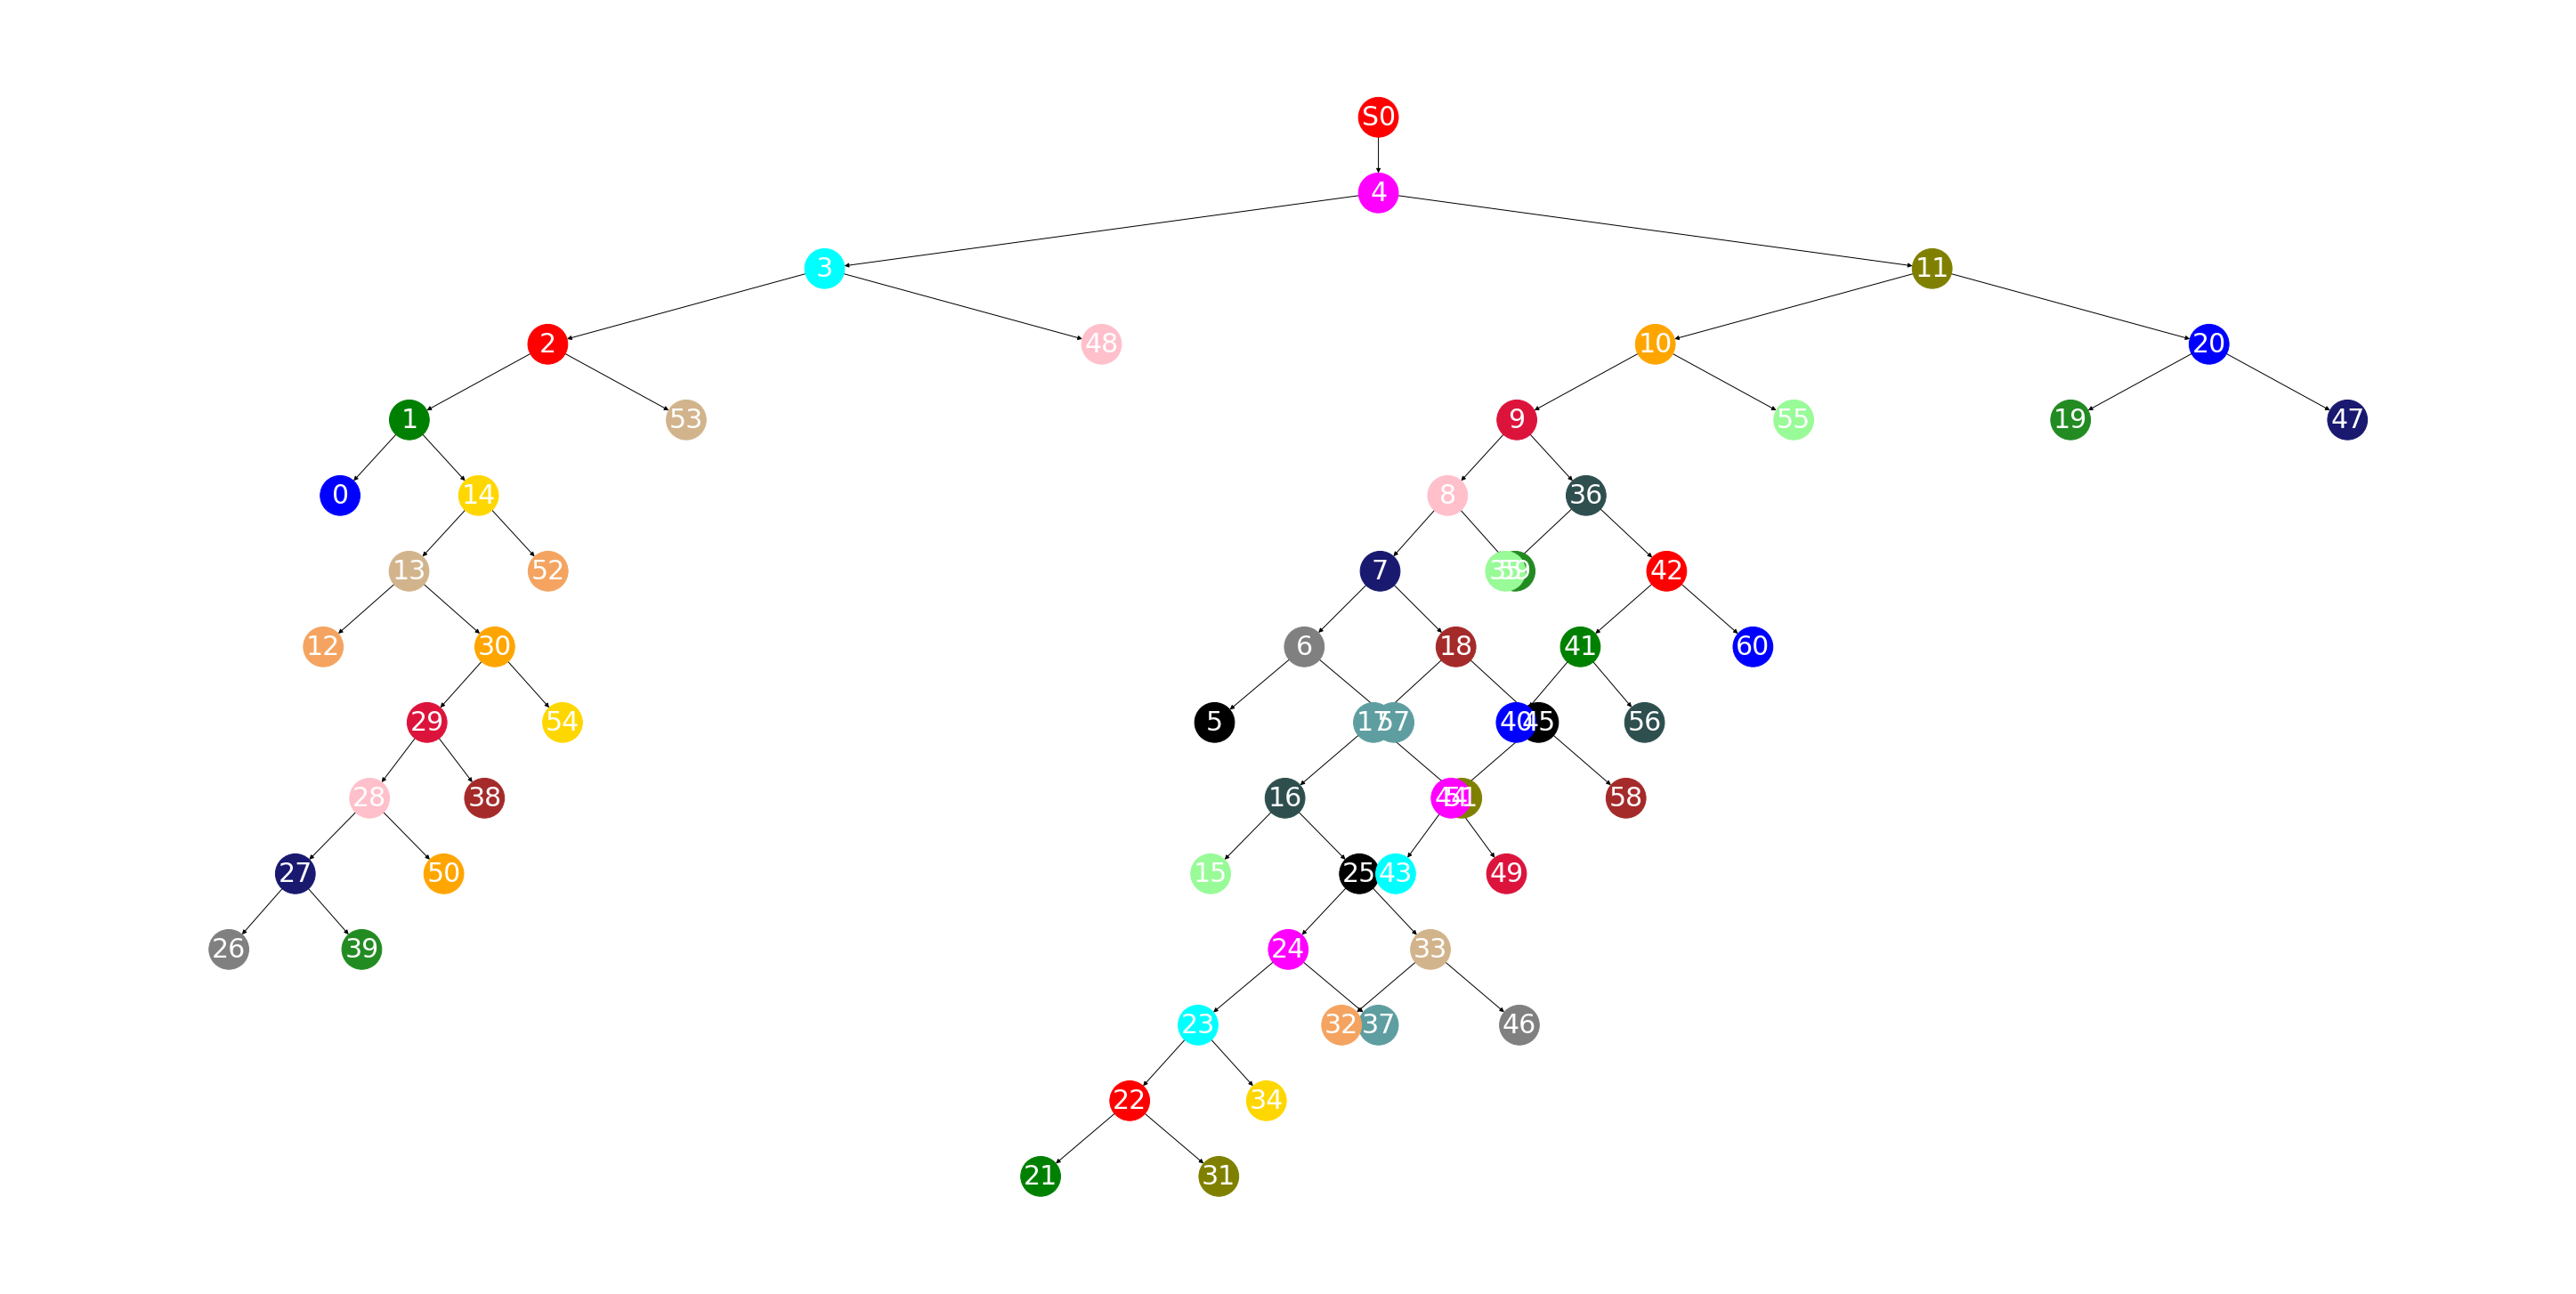

In [43]:
nviz.plot_limb_concept_network_2D(meshparty_adaptive_neuron,
                                 limb_name="L0",
                                 node_colors=return_colors)

In [44]:
nviz.visualize_neuron(meshparty_adaptive_neuron,
                      visualize_type=["mesh","skeleton"],
                      mesh_whole_neuron=True,
                     limb_branch_dict=dict(L0=[20]))


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [45]:
found_spines_meshparty_adaptive = spu.get_spine_meshes_unfiltered_from_mesh(meshparty_adaptive_neuron[0][20].mesh,segment_name="test")
found_spines_meshparty_adaptive

array([<trimesh.Trimesh(vertices.shape=(120, 3), faces.shape=(238, 3))>,
       <trimesh.Trimesh(vertices.shape=(46, 3), faces.shape=(87, 3))>,
       <trimesh.Trimesh(vertices.shape=(40, 3), faces.shape=(74, 3))>,
       <trimesh.Trimesh(vertices.shape=(38, 3), faces.shape=(69, 3))>,
       <trimesh.Trimesh(vertices.shape=(35, 3), faces.shape=(65, 3))>,
       <trimesh.Trimesh(vertices.shape=(33, 3), faces.shape=(60, 3))>,
       <trimesh.Trimesh(vertices.shape=(32, 3), faces.shape=(59, 3))>,
       <trimesh.Trimesh(vertices.shape=(23, 3), faces.shape=(41, 3))>,
       <trimesh.Trimesh(vertices.shape=(22, 3), faces.shape=(39, 3))>,
       <trimesh.Trimesh(vertices.shape=(26, 3), faces.shape=(38, 3))>,
       <trimesh.Trimesh(vertices.shape=(14, 3), faces.shape=(28, 3))>,
       <trimesh.Trimesh(vertices.shape=(16, 3), faces.shape=(27, 3))>,
       <trimesh.Trimesh(vertices.shape=(15, 3), faces.shape=(25, 3))>],
      dtype=object)

In [46]:
sk.graph_skeleton_and_mesh(main_mesh_faces=meshparty_adaptive_neuron[0][20].mesh.faces,
                           main_mesh_verts=meshparty_adaptive_neuron[0][20].mesh.vertices,
                            other_meshes= found_spines_meshparty_adaptive,
                          other_meshes_colors="red")